# **DAT565E-Deep Learning for Prediction of Business Outcomes**

<div class="LI-profile-badge"  data-version="v1" data-size="large" data-locale="en_US" data-type="horizontal" data-theme="light" data-vanity="drsalihtutun"><a class="LI-simple-link" href='https://www.linkedin.com/in/drsalihtutun/en-us?trk=profile-badge'>Salih Tutun, PhD</a></div>

![Imgur](https://i.imgur.com/4HJknC2.png)

# Lab-based Group Assignment 2:
## Customer Churning Prediction in the Telecommunications Sector

Tele-communication business suffers from customer churning. Those companies are especially interested in a customer churn early warning system. One of the most important components in such a system, is to predict whether a customer will churn with existing information. Companies are working hard to survive in this competitive market by using three main strategies:(1) acquire new customers, (2) upsell the existing customers, and (3) increase the retention period of customers. 

**Credit:** Ahmad, Abdelrahim Kasem, Assef Jafar, and Kadan Aljoumaa. "Customer churn prediction in telecom using machine learning in big data platform." Journal of Big Data 6, no. 1 (2019): 28.

<img src="https://miro.medium.com/max/1400/1*Xap6OxaZvD7C7eMQKkaHYQ.jpeg">

### Business Problem

The problem is to detect the potential of customer’s churn for decreasing the potential of customer’s churn, known as “the customer movement from one provider to another”. Therefore, finding factors that increase customer churn is important to take necessary actions to reduce this churn.

## *Please fill the below codes and find the best accuracy for training dataset and validation dataset based on the below questions. At the end, please explain how to improve the results!*

Note: Both accuracies are supposed to close to 0.9 or greater than this value. We will grade the assignment based on how your results close. For example, if your result is training = 0.89 and validation = 0.89, you will lose 2 points of the total grades.

- You can use L2 and dropout
- You can change the architecture (number of hidden layers or neurons)
- You can use early stoping
- You can change the batch size or epochs

Let's start to design our model!

## Q1: Please read and load the dataset?

In [1]:
# Mount with Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Data

In [2]:
import pandas as pd

# read csv
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAT565/2/Lab based Group Assignment 2/churn-dataset.csv")

In [3]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


## Q2: Please preprocess the dataset for the analysis?

Preprocessing

In [4]:
# Categorical -> dummy variables
df=pd.concat([df,pd.get_dummies(df.State)],axis=1)

# Categorical -> 0,1
df.applymap(lambda x: 0 if x=="No" else (1 if x=="Yes" else x))

# Drop the columns
df.drop(["State","International plan","Voice mail plan"],axis=1,inplace=True)

# Min-max scaling
for col in df.columns[:16]:
    df.loc[:,col]=(df.loc[:,col]-df.loc[:,col].min())/(df.loc[:,col].max()-df.loc[:,col].min())

In [5]:
df


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0.524793,0.068627,0.50,0.755701,0.68750,0.755701,0.542755,0.582353,0.542866,0.572161,...,0,0,0,0,0,0,0,0,0,0
1,0.438017,0.068627,0.52,0.460661,0.76875,0.460597,0.537531,0.605882,0.537690,0.599772,...,0,0,0,0,0,0,0,0,0,0
2,0.561983,0.068627,0.00,0.693843,0.71250,0.693830,0.333242,0.647059,0.333225,0.338457,...,0,0,0,0,0,0,0,0,0,0
3,0.342975,0.000000,0.00,0.853478,0.44375,0.853454,0.170195,0.517647,0.170171,0.436095,...,0,0,0,0,0,0,0,0,0,0
4,0.305785,0.068627,0.00,0.475200,0.70625,0.475184,0.407754,0.717647,0.407959,0.407629,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0.322314,0.068627,0.00,0.383979,0.61250,0.383970,0.521584,0.400000,0.521514,0.505835,...,0,0,0,0,0,0,0,0,0,0
2662,0.789256,0.068627,0.72,0.445268,0.48125,0.445171,0.592521,0.741176,0.592688,0.670083,...,0,0,0,0,0,0,0,0,0,0
2663,0.276860,0.068627,0.00,0.658780,0.35625,0.658786,0.421776,0.323529,0.421870,0.420154,...,0,0,0,0,0,0,0,0,1,0
2664,0.111570,1.000000,0.00,0.515393,0.68125,0.515426,0.794061,0.341176,0.794241,0.421862,...,0,0,0,0,0,0,0,0,0,0


Train-Validation-Test-Split

In [6]:
from sklearn.model_selection import train_test_split

# Train-test-validation split
train,_=train_test_split(df,test_size=0.2,stratify=df["Churn"])
validation,test=train_test_split(_,test_size=0.5)
print(train.shape,validation.shape,test.shape)
#2132->train 267->validation 267->test
#?68?16
#

(2132, 68) (267, 68) (267, 68)


## Q3: Please design your model **without using regularization** and explain why the results like this?

### Please design your model without regularization. 

In [ ]:
!pip install keras_visualizer

In [30]:
from keras.models import Sequential #
from keras.layers import Dense, Dropout #
from keras.regularizers import l2 #
from tensorflow.keras.optimizers import SGD, RMSprop, Adam #
from keras_visualizer import visualizer #

model=Sequential()
model.add(Dense(128,input_shape=(df.shape[1]-1,), activation='relu')) #67
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='sigmoid')) #get the value between 0-1
model.add(Dense(1,activation="sigmoid"))
visualizer(model, filename='graph01', format='png', view=True)


# Used rmsprop optimizer, binary_crossentropy loss
# you can use adam and SGD instead of rmsprop as well
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train.drop("Churn",axis=1),train["Churn"],
                    validation_data=(validation.drop("Churn",axis=1),validation["Churn"]),
          batch_size=16, epochs=100)
#The batch size is a hyperparameter that defines the number of samples to work through before updating the internal 
#model parameters. The network will update once a batch is finished.
#The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work 
#through the entire training dataset.

Epoch 1/100
134/134 [==============================] - 2s 6ms/step - loss: 0.4270 - accuracy: 0.8546 - val_loss: 0.3575 - val_accuracy: 0.8876
Epoch 2/100
134/134 [==============================] - 1s 5ms/step - loss: 0.4124 - accuracy: 0.8546 - val_loss: 0.3600 - val_accuracy: 0.8876
Epoch 3/100
134/134 [==============================] - 1s 5ms/step - loss: 0.3967 - accuracy: 0.8546 - val_loss: 0.3527 - val_accuracy: 0.8876
Epoch 4/100
134/134 [==============================] - 1s 5ms/step - loss: 0.3778 - accuracy: 0.8546 - val_loss: 0.3694 - val_accuracy: 0.8876
Epoch 5/100
134/134 [==============================] - 1s 5ms/step - loss: 0.3666 - accuracy: 0.8546 - val_loss: 0.3603 - val_accuracy: 0.8876
Epoch 6/100
134/134 [==============================] - 1s 5ms/step - loss: 0.3593 - accuracy: 0.8574 - val_loss: 0.3445 - val_accuracy: 0.8839
Epoch 7/100
134/134 [==============================] - 1s 5ms/step - loss: 0.3543 - accuracy: 0.8593 - val_loss: 0.3741 - val_accuracy: 0.8614

<function matplotlib.pyplot.imshow>

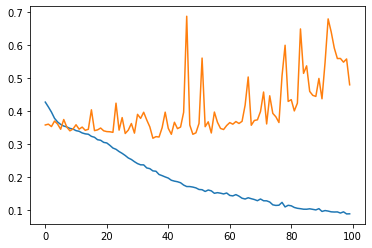

In [31]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

# blue is test loss orange is validation loss
# The gap between two line show overfitted problem

In [32]:
#more linear with sigmoid
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from keras_visualizer import visualizer 

model=Sequential()
model.add(Dense(256,input_shape=(df.shape[1]-1,), activation='sigmoid'))#if change 128 into 256,for 1st hidden layer, loss more information.ift will not improve the accuracy
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1,activation="sigmoid"))
visualizer(model, filename='graph01', format='png', view=True)
## change the num from 128 to 256
# Used rmsprop optimizer, binary_crossentropy loss
# you can use adam and SGD instead of rmsprop as well
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train.drop("Churn",axis=1),train["Churn"],
                    validation_data=(validation.drop("Churn",axis=1),validation["Churn"]),
          batch_size=64, epochs=100)#less sample

          # what is accuracy and val accuracy

Epoch 1/100
34/34 [==============================] - 1s 12ms/step - loss: 0.4770 - accuracy: 0.8546 - val_loss: 0.3902 - val_accuracy: 0.8876
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 0.4226 - accuracy: 0.8546 - val_loss: 0.3634 - val_accuracy: 0.8876
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 0.4156 - accuracy: 0.8546 - val_loss: 0.3574 - val_accuracy: 0.8876
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 0.4149 - accuracy: 0.8546 - val_loss: 0.3569 - val_accuracy: 0.8876
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 0.4151 - accuracy: 0.8546 - val_loss: 0.3558 - val_accuracy: 0.8876
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 0.4149 - accuracy: 0.8546 - val_loss: 0.3563 - val_accuracy: 0.8876
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 0.4150 - accuracy: 0.8546 - val_loss: 0.3555 - val_accuracy: 0.8876
Epoch 8/100


<function matplotlib.pyplot.imshow>

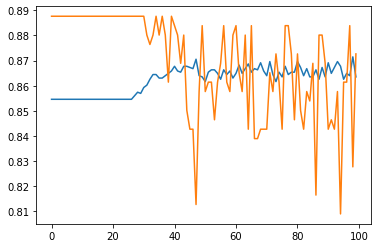

In [33]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [34]:
from keras.losses import binary_crossentropy

# real y
real = test.Churn.astype("int").values
# predicted y
pred = model.predict(test.drop("Churn",axis=1)).flatten()
# binary_crossentropy
print(float(binary_crossentropy(real,pred)))

0.4196617305278778


In [35]:
# calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.8426966292134831


Comment: Please explain your model and why the results like this. 

In [ ]:
#When epoch is equals around 40, the fluctuation of validation accuracy is becoming unstable and gap between loss functions are 
#becoming bigger. It means we are facing the overfitting problem. The validation accuracy even become worse when epoch is greater
#than 40. 

# Please use **Early Stopping** and show how to improve the results. 


In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

model=Sequential()
model.add(Dense(128,input_shape=(df.shape[1]-1,), activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1,activation="sigmoid"))
visualizer(model, filename='graph01', format='png', view=True)

# Used rmsprop optimizer, binary_crossentropy loss

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train.drop("Churn",axis=1),train["Churn"],
                    validation_data=(validation.drop("Churn",axis=1),validation["Churn"]),
          batch_size=16, epochs=40)
# change epochs from 100 to 40
 #We can realize "early stop" by reducing the parameter "epoch". The training will stop after finishing the number of epoch you set.

Epoch 1/40
134/134 [==============================] - 2s 6ms/step - loss: 0.5016 - accuracy: 0.8124 - val_loss: 0.3744 - val_accuracy: 0.8876
Epoch 2/40
134/134 [==============================] - 1s 5ms/step - loss: 0.4168 - accuracy: 0.8546 - val_loss: 0.3576 - val_accuracy: 0.8876
Epoch 3/40
134/134 [==============================] - 1s 5ms/step - loss: 0.4149 - accuracy: 0.8546 - val_loss: 0.3554 - val_accuracy: 0.8876
Epoch 4/40
134/134 [==============================] - 1s 5ms/step - loss: 0.4148 - accuracy: 0.8546 - val_loss: 0.3564 - val_accuracy: 0.8876
Epoch 5/40
134/134 [==============================] - 1s 5ms/step - loss: 0.4148 - accuracy: 0.8546 - val_loss: 0.3553 - val_accuracy: 0.8876
Epoch 6/40
134/134 [==============================] - 1s 5ms/step - loss: 0.4147 - accuracy: 0.8546 - val_loss: 0.3550 - val_accuracy: 0.8876
Epoch 7/40
134/134 [==============================] - 1s 5ms/step - loss: 0.4146 - accuracy: 0.8546 - val_loss: 0.3551 - val_accuracy: 0.8876
Epoch 

<function matplotlib.pyplot.imshow>

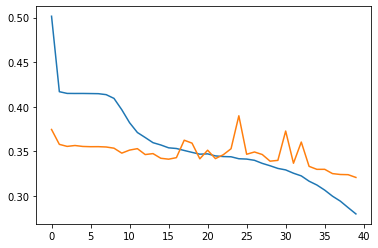

In [39]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow>

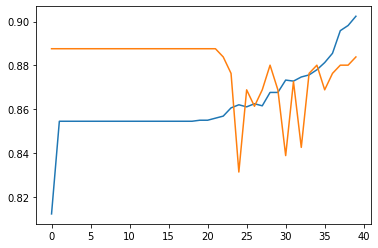

In [40]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [41]:
from keras.losses import binary_crossentropy

# real y
real = test.Churn.astype("int").values
# predicted y
pred = model.predict(test.drop("Churn",axis=1)).flatten()
# binary_crossentropy
print(float(binary_crossentropy(real,pred)))

0.3995743691921234


In [42]:
# calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.8651685393258427


Comment: Please explain your model and why the results are like this. 
By changing the epochs from 100 to 40. We improve the model accuracy from 0.84 to 0.86

In [ ]:
#We improve the model accuracy by stopping training model early when epoch = 40. It is a good choice as I mention above, when
#the epoch = 40, the validation accuracy become unstable, if we stop at epoch = 40, it can help model to avoid overfitting 
#probelm. As the result shows, our accuracy improves 0.02%. 

## Q4: How you can solve the problem and improve your model?

### Please add the **Dropout** on your model. 

In [52]:
# Dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

# Drop out used at the first two layers
model=Sequential()
model.add(Dense(128,input_shape=(df.shape[1]-1,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train.drop("Churn",axis=1),train["Churn"],
                    validation_data=(validation.drop("Churn",axis=1),validation["Churn"]),
          batch_size=24, epochs=40)

Epoch 1/40
89/89 [==============================] - 2s 8ms/step - loss: 0.4355 - accuracy: 0.8541 - val_loss: 0.3675 - val_accuracy: 0.8876
Epoch 2/40
89/89 [==============================] - 1s 7ms/step - loss: 0.4066 - accuracy: 0.8546 - val_loss: 0.3567 - val_accuracy: 0.8876
Epoch 3/40
89/89 [==============================] - 1s 9ms/step - loss: 0.3937 - accuracy: 0.8546 - val_loss: 0.3493 - val_accuracy: 0.8876
Epoch 4/40
89/89 [==============================] - 1s 11ms/step - loss: 0.3788 - accuracy: 0.8546 - val_loss: 0.3446 - val_accuracy: 0.8876
Epoch 5/40
89/89 [==============================] - 1s 10ms/step - loss: 0.3702 - accuracy: 0.8546 - val_loss: 0.3441 - val_accuracy: 0.8876
Epoch 6/40
89/89 [==============================] - 1s 9ms/step - loss: 0.3644 - accuracy: 0.8541 - val_loss: 0.3405 - val_accuracy: 0.8876
Epoch 7/40
89/89 [==============================] - 1s 10ms/step - loss: 0.3615 - accuracy: 0.8560 - val_loss: 0.3463 - val_accuracy: 0.8801
Epoch 8/40
89/89 

<function matplotlib.pyplot.imshow>

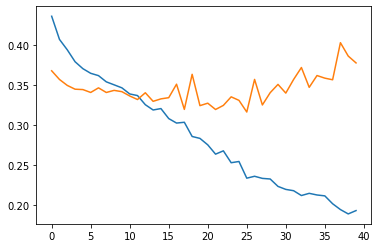

In [53]:
# same as above, plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow>

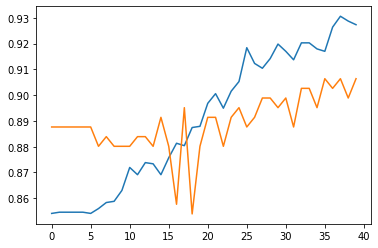

In [54]:
# same as above, plot accuracy, val_accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [55]:
# same as above, calculate  binary_crossentropy
from keras.losses import binary_crossentropy
real = test.Churn.astype("int").values
pred = model.predict(test.drop("Churn",axis=1)).flatten()
print(float(binary_crossentropy(real,pred)))

0.5129240155220032


In [56]:
# Again, calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.8651685393258427


Comment: Please explain your model and why the results like this. 

In [ ]:
#The gap between two loss functions is still big,the binary_crossentropy is also big. It means we are suffering from 
#underfitting problem. It is because we use drop out and does not train model enough, the loss does not decrease through 
#40 epochs. So we might need to do weight regularization and use more epochs to improve our model. 

### Please add **L2 Weight Regularization**

- Softmax, LR decay, optimizers, units, and layers

In [57]:
# L2

model=Sequential()
# L2 regularization applied at the first hidden layer
model.add(Dense(64,input_shape=(df.shape[1]-1,), activation='relu', kernel_regularizer="l2"))
model.add(Dense(64, activation='relu', kernel_regularizer="l2"))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train.drop("Churn",axis=1),train["Churn"],
                    validation_data=(validation.drop("Churn",axis=1),validation["Churn"]),
          batch_size=24, epochs=60)

Epoch 1/60
89/89 [==============================] - 2s 8ms/step - loss: 1.1501 - accuracy: 0.8523 - val_loss: 0.7170 - val_accuracy: 0.8876
Epoch 2/60
89/89 [==============================] - 0s 5ms/step - loss: 0.6095 - accuracy: 0.8546 - val_loss: 0.4576 - val_accuracy: 0.8876
Epoch 3/60
89/89 [==============================] - 0s 5ms/step - loss: 0.4740 - accuracy: 0.8546 - val_loss: 0.4042 - val_accuracy: 0.8876
Epoch 4/60
89/89 [==============================] - 0s 6ms/step - loss: 0.4400 - accuracy: 0.8546 - val_loss: 0.3789 - val_accuracy: 0.8876
Epoch 5/60
89/89 [==============================] - 0s 5ms/step - loss: 0.4230 - accuracy: 0.8546 - val_loss: 0.3830 - val_accuracy: 0.8876
Epoch 6/60
89/89 [==============================] - 0s 6ms/step - loss: 0.4098 - accuracy: 0.8546 - val_loss: 0.3736 - val_accuracy: 0.8876
Epoch 7/60
89/89 [==============================] - 0s 5ms/step - loss: 0.4044 - accuracy: 0.8546 - val_loss: 0.3628 - val_accuracy: 0.8876
Epoch 8/60
89/89 [==

<function matplotlib.pyplot.imshow>

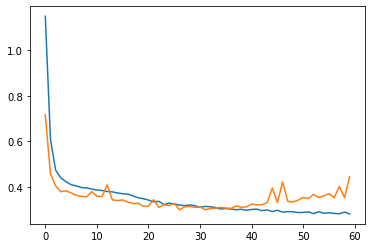

In [58]:
# same as above, plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow>

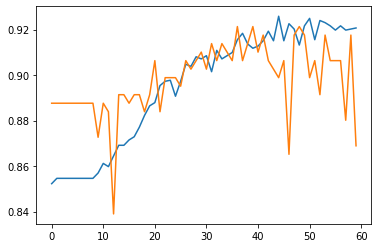

In [59]:
# same as above, plot accuracy, val_accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [60]:
# same as above, calculate binary_crossentropy
from keras.losses import binary_crossentropy
real = test.Churn.astype("int").values
pred = model.predict(test.drop("Churn",axis=1)).flatten()
print(float(binary_crossentropy(real,pred)))

0.40830284357070923


In [61]:
# Again, calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.846441947565543


### Please use **L2 + Dropout together**

In [62]:
# Dropout + L2

model=Sequential()
model.add(Dense(128,input_shape=(df.shape[1]-1,), activation='relu', kernel_regularizer="l2"))
#model.add(Dense(128,input_shape=(df.shape[1]-1,), activation='relu', kernel_regularizer="12"))
model.add(Dropout(0.15))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.15))
#model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train.drop("Churn",axis=1),train["Churn"],
                    validation_data=(validation.drop("Churn",axis=1),validation["Churn"]),
          batch_size=20, epochs=58)


Epoch 1/58
107/107 [==============================] - 2s 7ms/step - loss: 0.8379 - accuracy: 0.8546 - val_loss: 0.5285 - val_accuracy: 0.8876
Epoch 2/58
107/107 [==============================] - 1s 5ms/step - loss: 0.4951 - accuracy: 0.8546 - val_loss: 0.4000 - val_accuracy: 0.8876
Epoch 3/58
107/107 [==============================] - 1s 5ms/step - loss: 0.4390 - accuracy: 0.8546 - val_loss: 0.3861 - val_accuracy: 0.8876
Epoch 4/58
107/107 [==============================] - 1s 5ms/step - loss: 0.4247 - accuracy: 0.8546 - val_loss: 0.3717 - val_accuracy: 0.8876
Epoch 5/58
107/107 [==============================] - 1s 5ms/step - loss: 0.4165 - accuracy: 0.8546 - val_loss: 0.3712 - val_accuracy: 0.8876
Epoch 6/58
107/107 [==============================] - 0s 5ms/step - loss: 0.4068 - accuracy: 0.8546 - val_loss: 0.3626 - val_accuracy: 0.8876
Epoch 7/58
107/107 [==============================] - 1s 5ms/step - loss: 0.4057 - accuracy: 0.8546 - val_loss: 0.4465 - val_accuracy: 0.8876
Epoch 

<function matplotlib.pyplot.imshow>

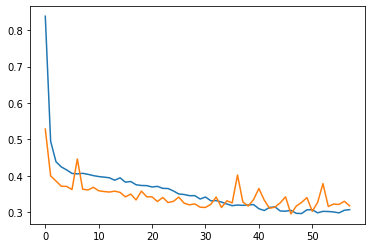

In [63]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow>

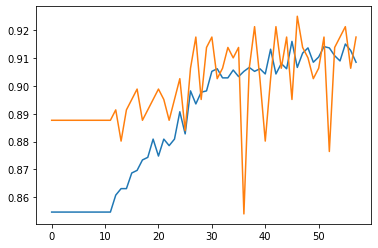

In [64]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [65]:
from keras.losses import binary_crossentropy
real = test.Churn.astype("int").values
pred = model.predict(test.drop("Churn",axis=1)).flatten()
print(float(binary_crossentropy(real,pred)))

0.3703896999359131


In [66]:
# Again, calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.8838951310861424


Comment: Please explain your model and why the results like this. 

In [1]:
#This model has the best result of accuracy and also dispaly the least loss results. We add more epochs for this model and then
#add wieght regularization, so we got a great result. 

## Q5: Please interpret all results here!

Note: Please explain what did you see and how to improve the model. You can compare all models and show what we need to do if we have overfitting and underfitting in the model. 

Comment: For sure L2 + Dropout together is the best. It improve the acuuracy from 0.84 to 0.88

If you have questions, please contact with me.

Salih Tutun, PhD

salihtutun@wustl.edu